<a href="https://colab.research.google.com/github/Masakinka/Mid-term-Project/blob/main/Predicting_Bank_Term_Deposit_Subscriptions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Overview

This project develops a machine learning model to predict whether a client will subscribe to a term deposit at a bank. The dataset comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing) , based on direct marketing campaigns conducted by a Portuguese banking institution.

We will be working with the file `bank-additional-full.csv`, which can be downloaded [here](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view).

### Feature Description

| Feature    | Description                                            | Data Type  |
|------------|--------------------------------------------------------|------------|
| `age`      | Client's age                                            | Numerical  |
| `job`      | Type of job                                             | Categorical|
| `marital`  | Marital status                                          | Categorical|
| `education`| Education level                                         | Categorical|
| `default`  | Has credit in default?                                  | Binary     |
| `balance`  | Average yearly balance in euros                         | Numerical  |
| `housing`  | Has housing loan?                                       | Binary     |
| `loan`     | Has personal loan?                                      | Binary     |
| `contact`  | Contact communication type (last contact)               | Categorical|
| `day`      | Last contact day of the month                           | Numerical  |
| `month`    | Last contact month of the year                          | Categorical|
| `duration` | Duration of last contact in seconds                     | Numerical  |
| `campaign` | Number of contacts performed during this campaign       | Numerical  |
| `pdays`    | Number of days since last contact in a previous campaign| Numerical  |
| `previous` | Number of contacts before this campaign                 | Numerical  |
| `poutcome` | Outcome of the previous marketing campaign              | Categorical|
| `y`        | Did the client subscribe to a term deposit? (target)    | Binary     |


## Problem Statement
We aim to develop a classification model to determine if a client will subscribe to a term deposit based on their personal, financial, and historical interactions with the bank.

##Key Project Goals
- Build a robust classification model for subscription prediction.
- Identify key factors influencing client decisions.
- Offer actionable insights to improve marketing campaign effectiveness.

## Scope and Limitations
- The model uses historical data, not real-time updates.
- Pre-cleaned dataset.
- Focuses on general customers without distinguishing client segments.

## Main Objective
To build a binary classification model that predicts term deposit subscription outcomes.

## Practical Application
This analysis is common in industries reliant on forecasting customer actions, such as banking, finance, and e-commerce.

## Dataset and ML Task

For this project, we are using a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), which contains data from direct marketing campaigns (phone calls) conducted by a Portuguese banking




## Imports and Initial Setup:
We'll begin by importing the necessary libraries and loading the dataset.

In [68]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import confusion_matrix

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, Trials
from sklearn.metrics import f1_score

# Setting display options for easier visualization of data
pd.set_option('display.max.rows', 130)
pd.set_option('display.max.columns', 130)
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.expand_frame_repr', False)

In [69]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Exploratory Data Analysis (EDA)
In this section, we will explore the dataset and investigate the relationships between key features that could affect a client's decision to subscribe to a term deposit.

### Loading and Inspecting the Dataset

In this step, we load the dataset and inspect its structure to understand the types of variables available for analysis.

In [70]:
from google.colab import drive
drive.mount('/content/drive')

# Loading dataset
raw_df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/bank-additional-full.csv", sep=';')
raw_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


### Data Structure Overview

We check the structure of the dataset to identify data types and spot any potential issues such as missing values.

In [71]:
# Checking the structure of the dataset
raw_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Summary Statistics for Numeric Variables

We generate summary statistics for the numeric variables to get an initial understanding of their distributions and potential outliers.

In [72]:
# Summary statistics for numeric features
raw_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


The dataset contains 41,188 rows and 21 columns. All columns are fully populated, and no missing values were detected.



**Checking for Missing Values**



In [73]:
# Checking for missing values
missing_values = raw_df.isnull().sum()
print('Missing values in each variable:')
print(missing_values[missing_values > 0])

Missing values in each variable:
Series([], dtype: int64)


The dataset contains no missing values, which is advantageous as no imputation will be required.



**Dataset Dimensions**

In [74]:
raw_df.shape

(41188, 21)

The dataset has 41,188 rows and 21 columns.

**Target Variable (y) Distribution**

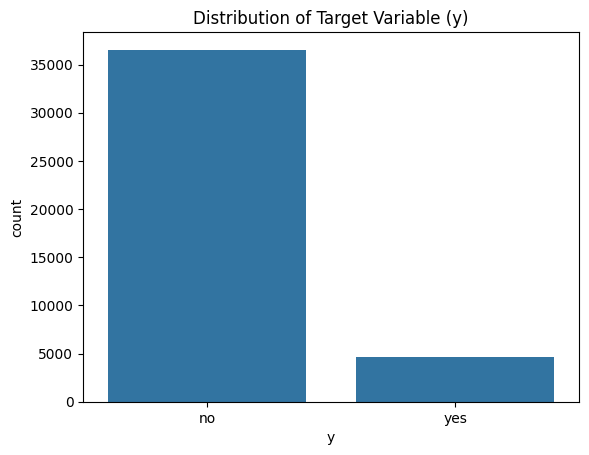

y
no    0.89
yes   0.11
Name: proportion, dtype: float64


In [75]:
# Distribution of the target variable
sns.countplot(data=raw_df, x='y')
plt.title('Distribution of Target Variable (y)')
plt.show()

# Checking the frequency of target classes
print(raw_df['y'].value_counts(normalize=True))

The target variable is imbalanced. Most clients did not subscribe to the term deposit, with a significant portion of the dataset labeled as "no" compared to "yes". This imbalance will need to be considered when building models.

**Analyzing Categorical Variables**

In [76]:
# Extracting categorical features
categorical_features = raw_df.select_dtypes(include='object').columns

# Number of categorical variables
len(categorical_features)

11

The dataset contains 11 categorical variables.

**Distribution of Categorical Variables**

This visualization helps us understand the distribution of each categorical feature and its relationship with the target variable (y).

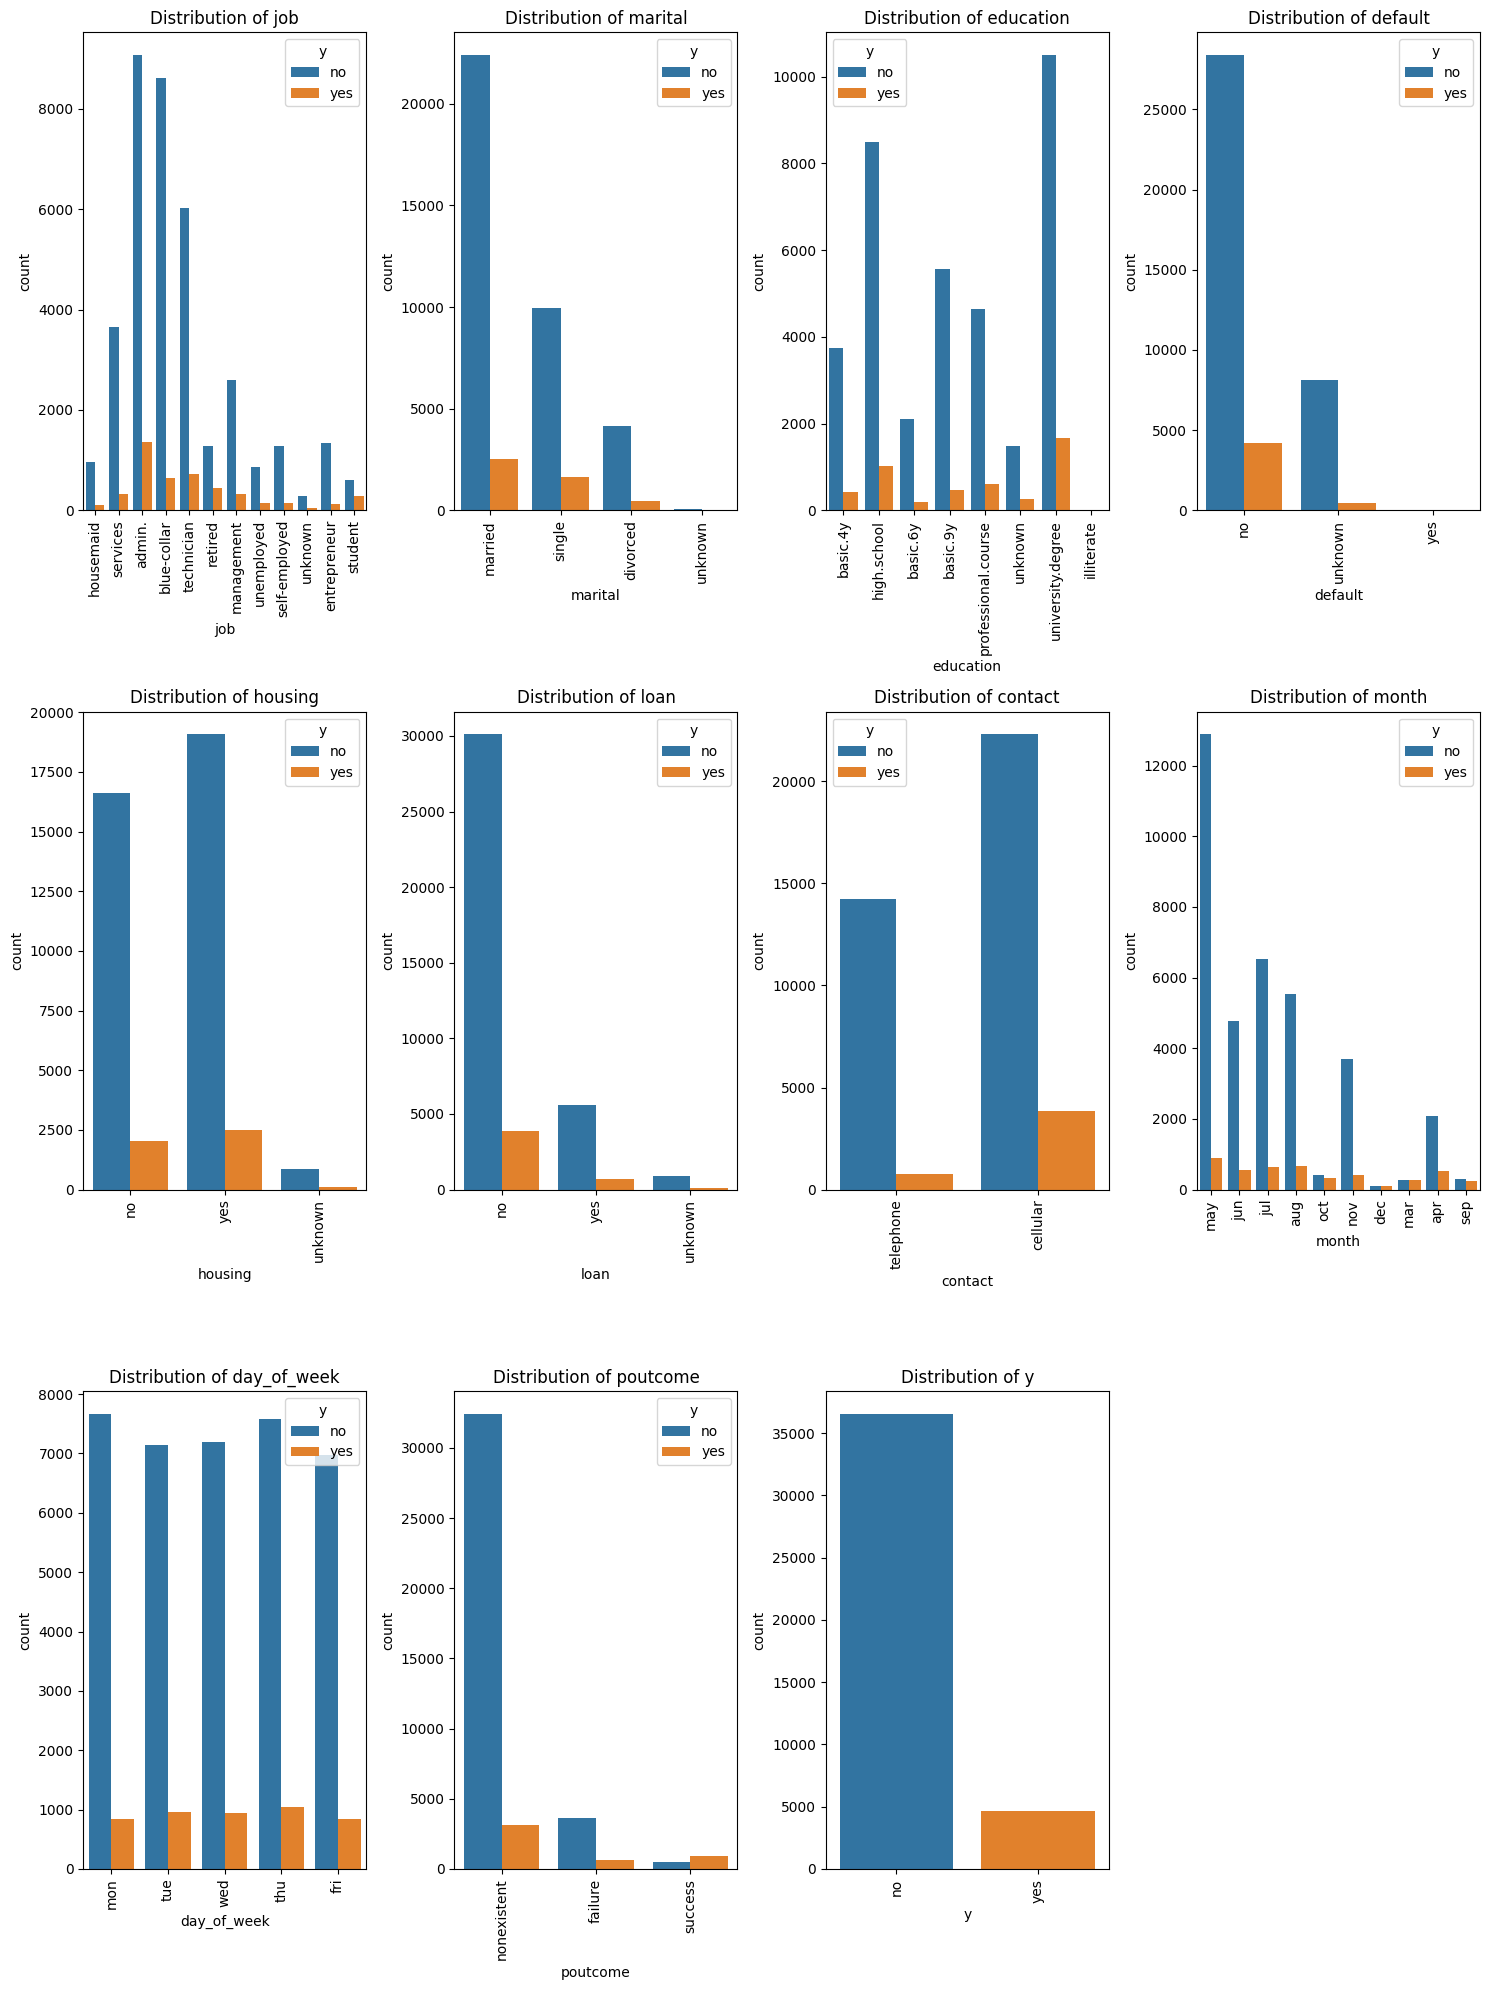

In [77]:
# Visualizing the distribution of categorical features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=raw_df, x=feature, hue='y')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Relationship Between Categorical Variables and Target Variable (y)**

This bar chart visualization shows the proportion of target classes (yes or no) within each category of the categorical features.

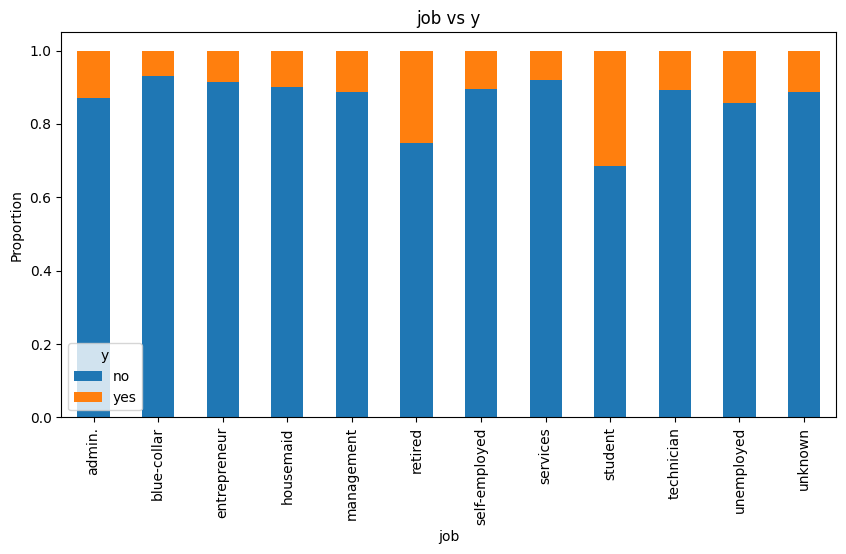

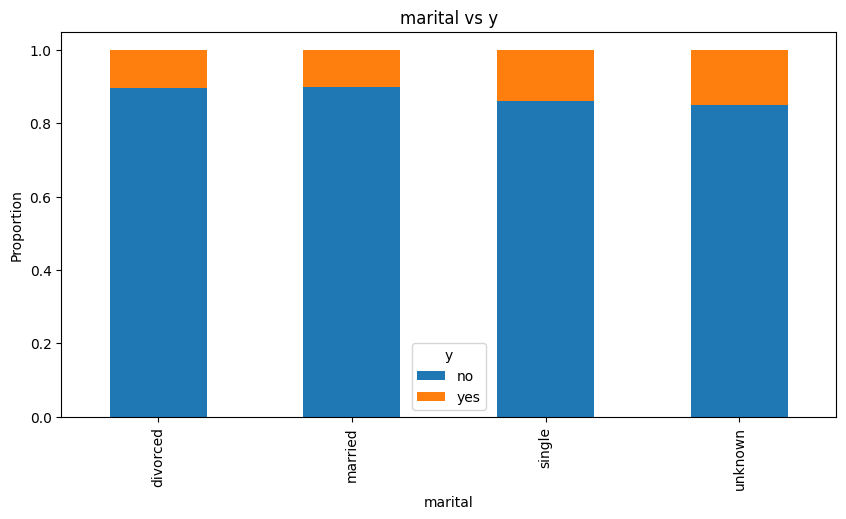

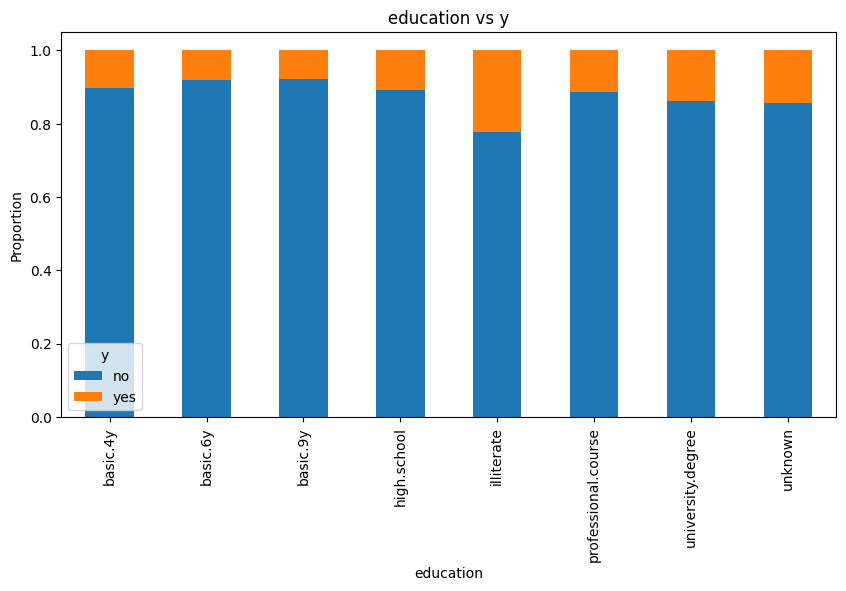

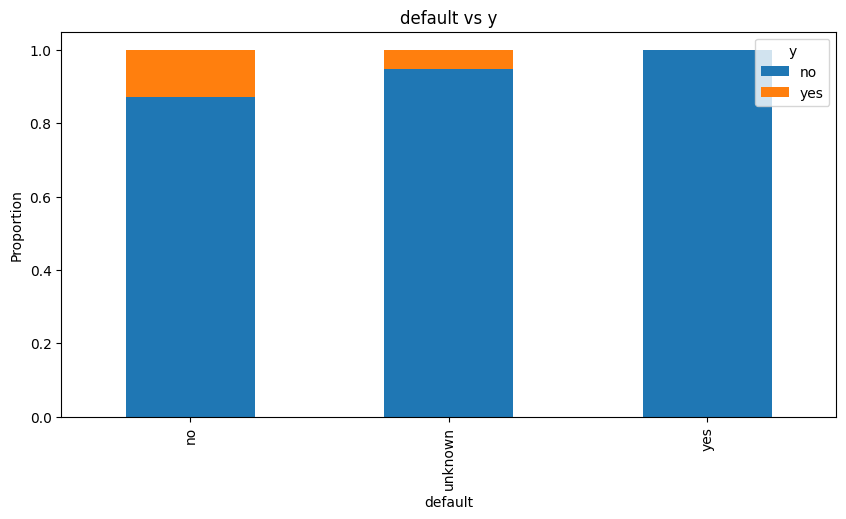

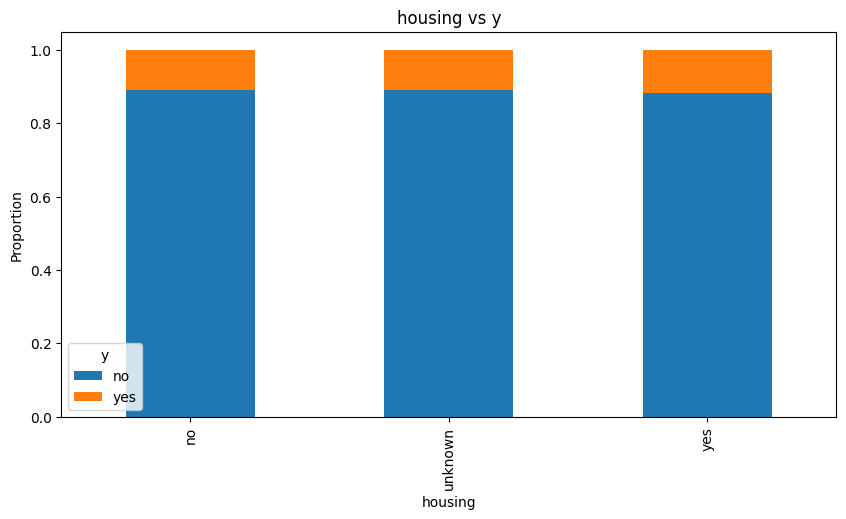

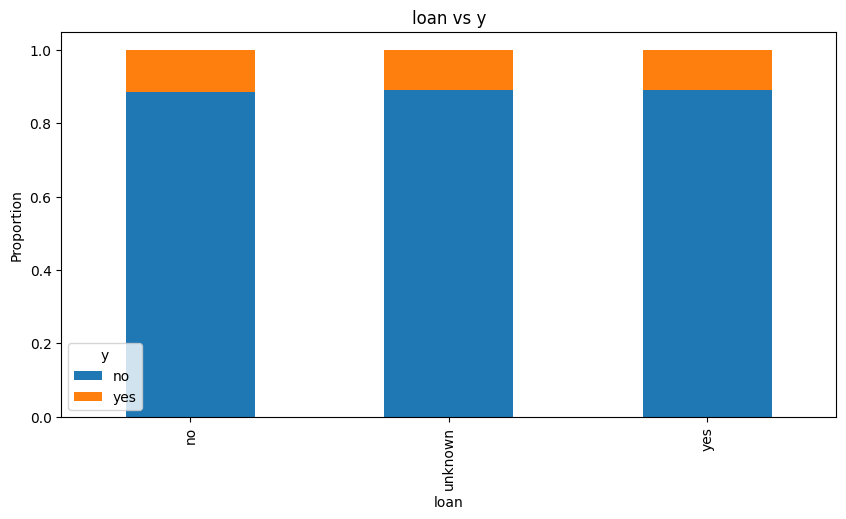

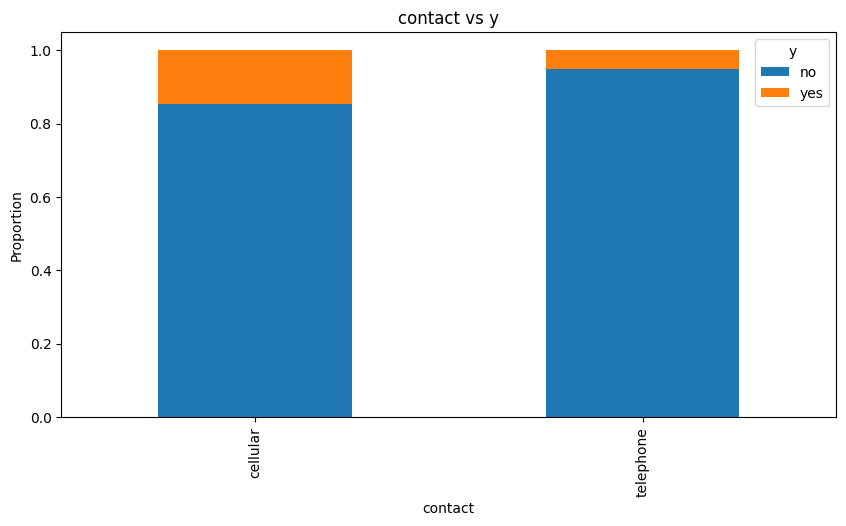

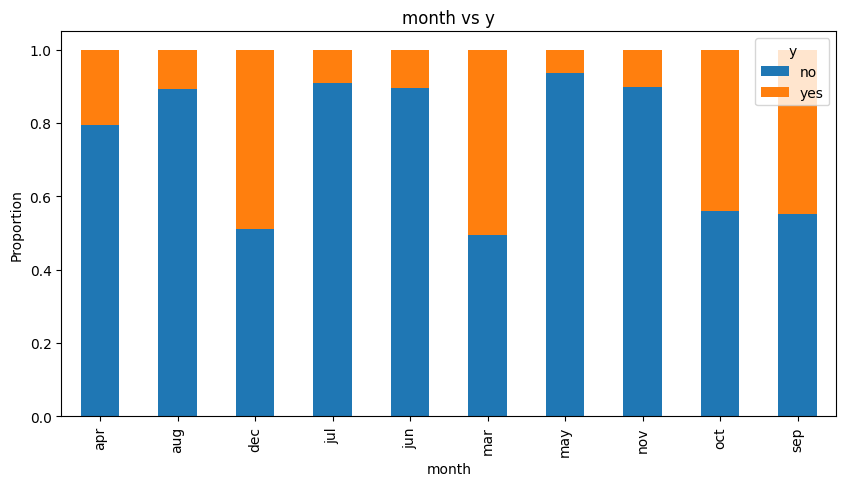

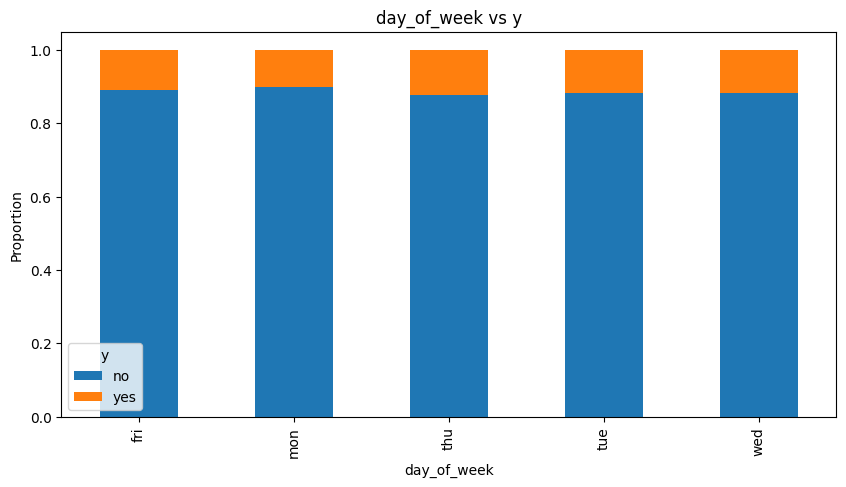

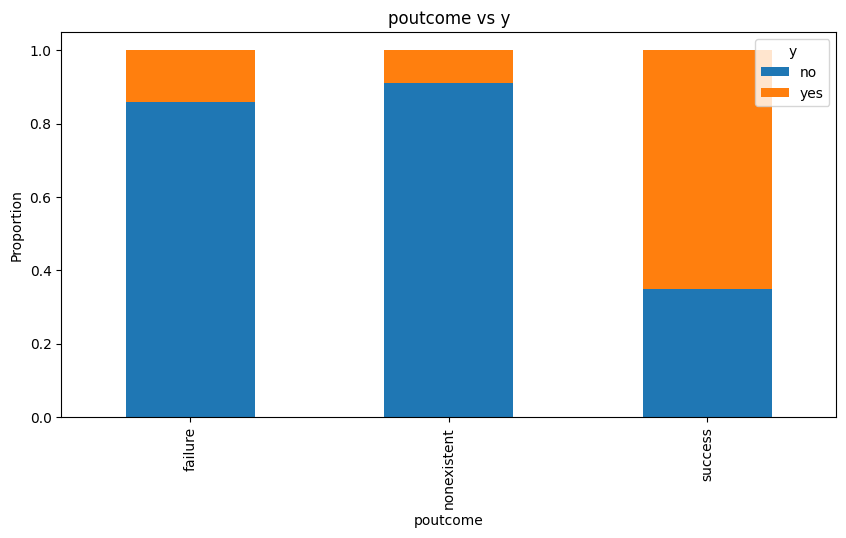

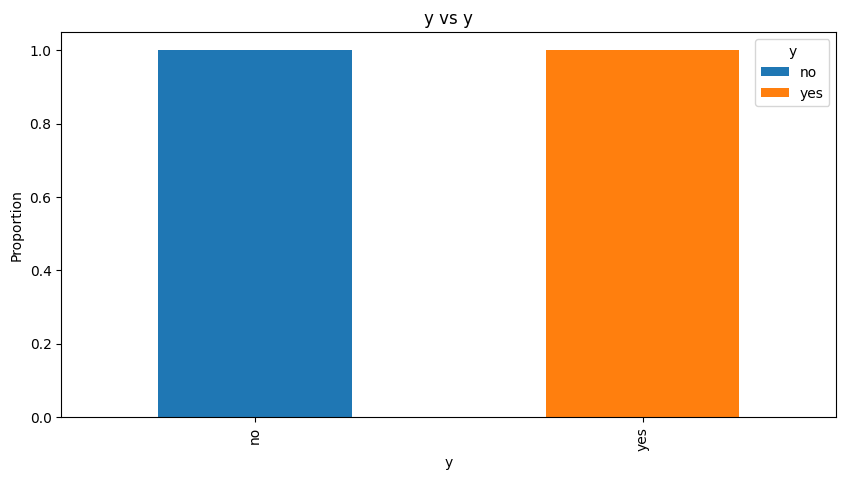

In [78]:
# Examining the relationship between categorical features and the target variable
for feature in categorical_features:
    cross_tab = pd.crosstab(raw_df[feature], raw_df['y'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{feature} vs y')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='y')
    plt.show()

**Analyzing Numerical Variables**

In [79]:
# Extracting numerical features
number_df = raw_df.select_dtypes(include='number')
number_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [80]:
# Number of numerical variables
len(number_df.columns)

10

The dataset contains 10 numerical variables.

## Key Findings from EDA:
1. **Imbalanced Target Variable**: Approximately 89% of clients did not subscribe to the term deposit.
2. **High Correlations**: Some economic indicators like `emp.var.rate` and `euribor3m` are highly correlated.
3. **Categorical Variables**:
    - "Blue-collar" and "services" job categories have a higher proportion of clients who did not subscribe.
    - Higher education clients are more likely to subscribe.
4. **Numerical Variables**:
    - Longer `duration` of the last contact strongly indicates a positive response.

Next, let's dive into visualizing categorical and numerical data.


**Distribution of Numerical Variables**

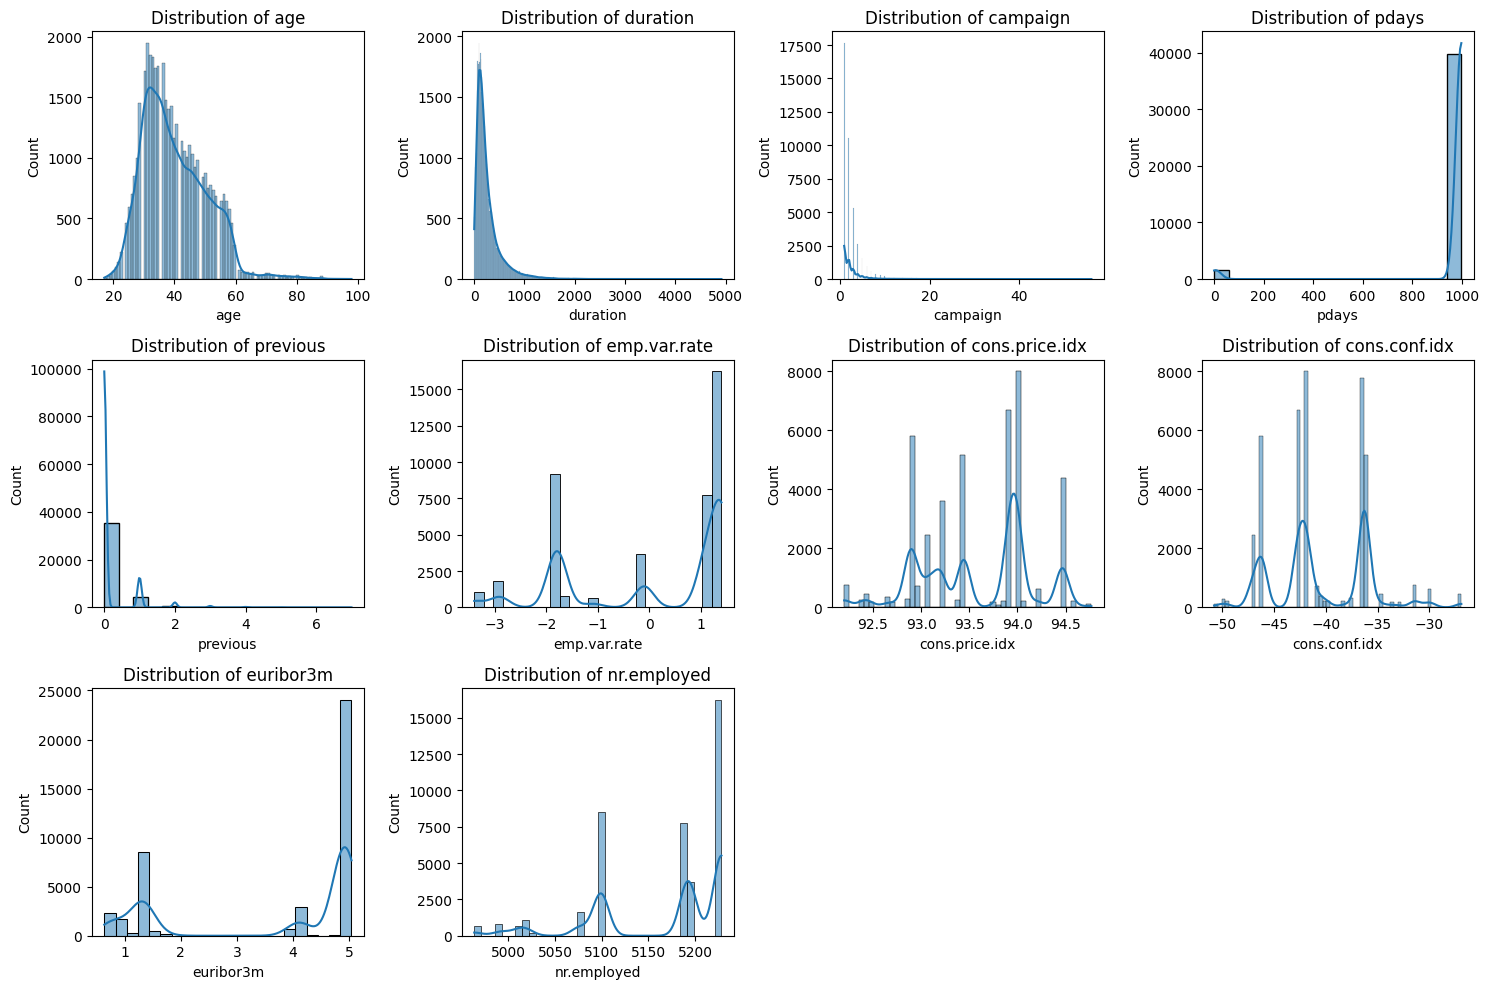

In [81]:
# Visualizing the distribution of numerical variables
plt.figure(figsize=(15, 10))
for i, feature in enumerate(number_df.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=raw_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The histograms reveal the distribution of each numerical feature. We will analyze how these distributions might impact the model.



**Numerical Variables vs. Target Variable (y)**

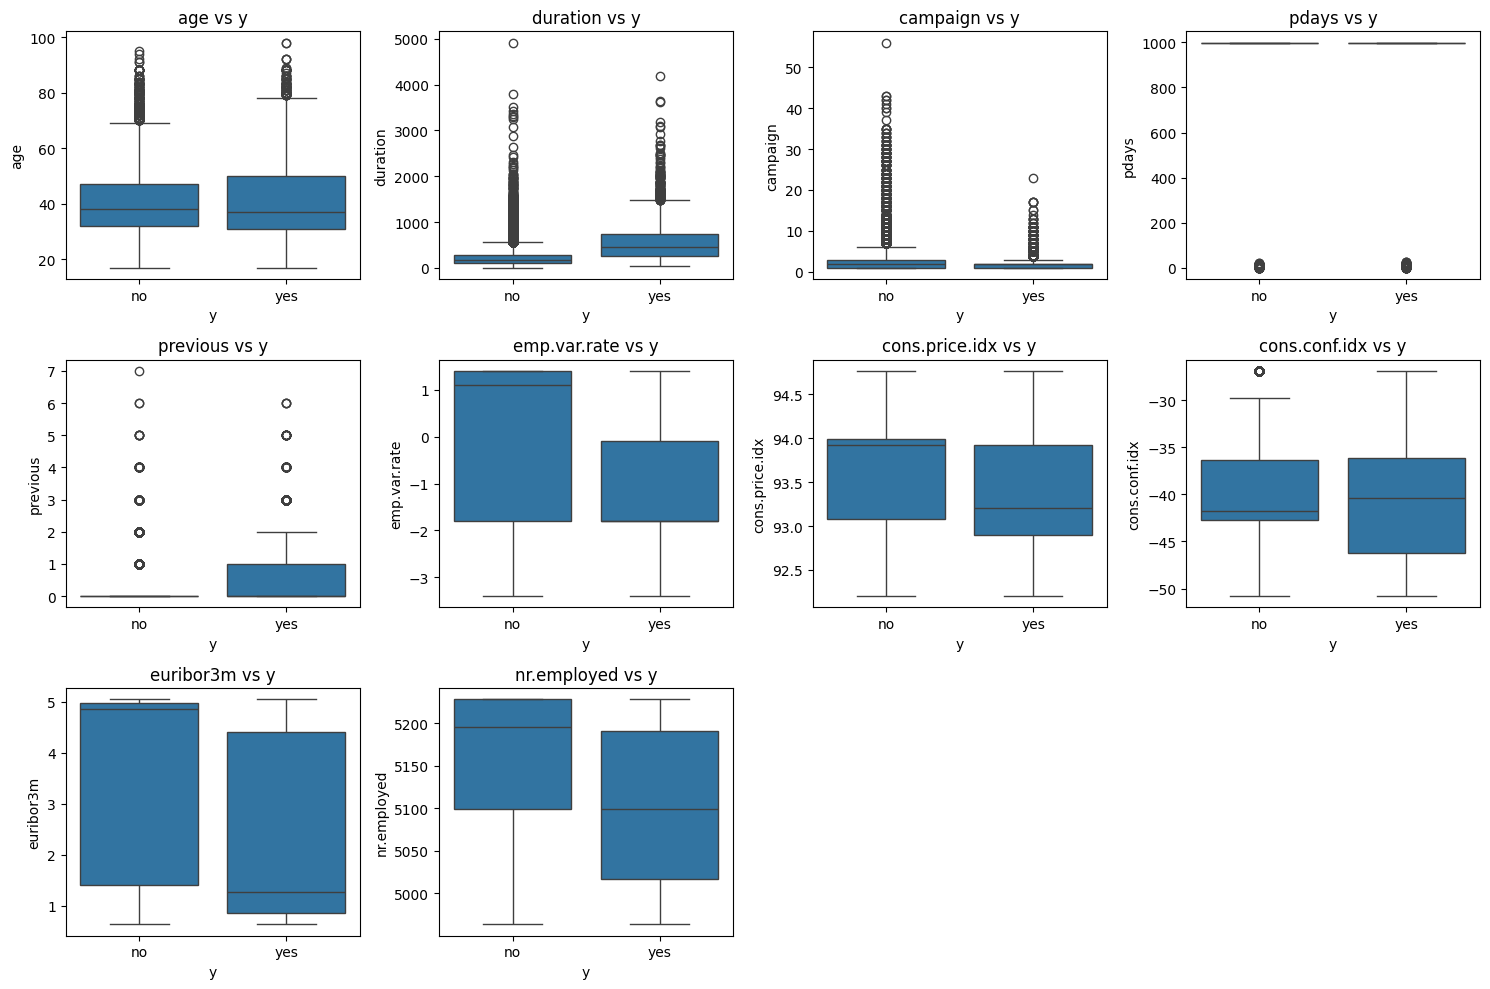

In [82]:
# Analyzing the relationship between numerical features and the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(number_df):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=raw_df, x='y', y=feature)
    plt.title(f'{feature} vs y')
plt.tight_layout()
plt.show()

Box plots help visualize the relationship between numerical features and the target variable, showing how different values of a numerical feature relate to whether the client subscribed to a term deposit.

**Correlation Matrix for Numerical Variables**

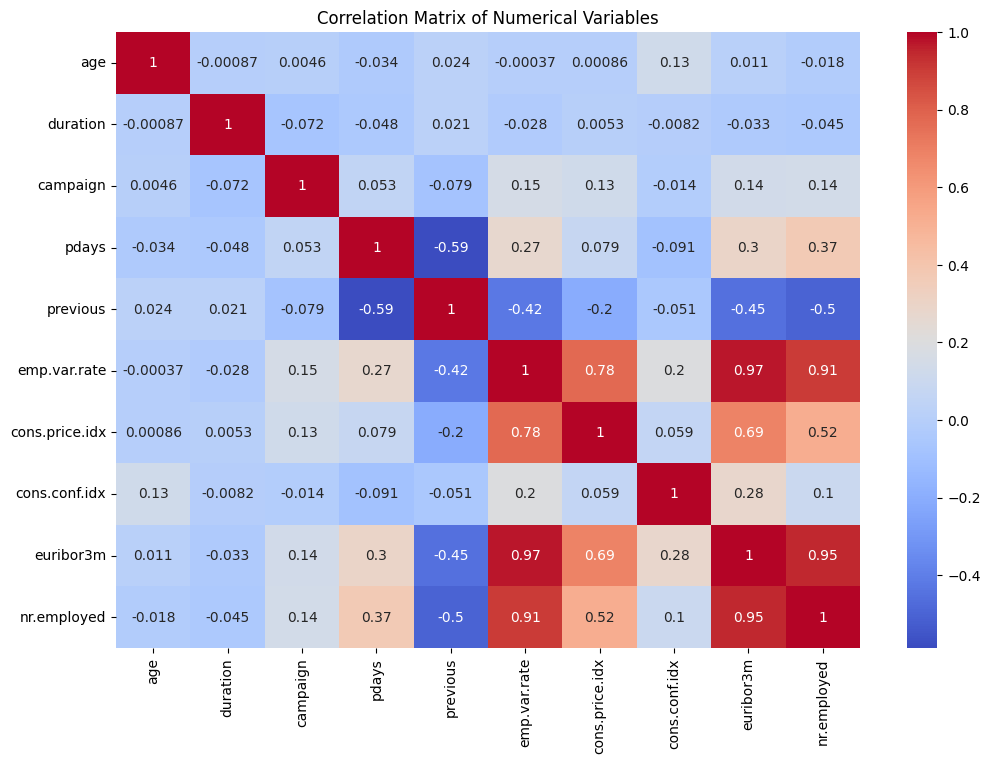

In [83]:
# Correlation matrix for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = number_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix shows the relationships between the numerical features. Some features, such as emp.var.rate and euribor3m, have high correlations with each other, indicating potential multicollinearity.

## Initial Findings from the EDA

The dataset is highly imbalanced, with about 89% of clients not subscribing to the term deposit and only 11% subscribing.

### Categorical Variable Insights:
- **Job**: Certain job categories, such as "blue-collar" and "services", have a higher proportion of clients who did not subscribe, while "management" roles are more likely to subscribe.
- **Education**: Clients with higher education, especially those with a university degree, are more likely to subscribe.
- **Contact Method**: Clients contacted via cellular communication show a higher success rate in subscribing.
- **Previous Campaign Outcome**: Successful previous campaigns significantly increase the likelihood of current subscriptions.

### Numerical Variable Insights:
- **Duration**: The length of the last contact is a strong indicator of whether a client will subscribe.
- **Previous Contacts**: More previous contacts increase the probability of subscription.
- **Economic Indicators**: Features like `emp.var.rate`, `euribor3m`, and `nr.employed` reflect the influence of economic conditions on client decisions.

## Hypothesis Formulation
- **Hypothesis 1**: The longer the last contact with a client, the higher the probability that the client will subscribe to a term deposit.
- **Hypothesis 2**: Clients with professional or managerial roles and higher education are more likely to subscribe.
- **Hypothesis 3**: Clients with a successful experience in previous campaigns are more likely to subscribe again.
- **Hypothesis 4**: Improvements in economic conditions (as indicated by features like `emp.var.rate`, `euribor3m`, and `nr.employed`) increase the likelihood of subscription.

## Next Steps

Further analysis is required to address potential multicollinearity, particularly between economic indicators like `emp.var.rate` and `euribor3m`. This will ensure that the models built will not suffer from multicollinearity issues.


## Variance Inflation Factor (VIF) Calculation

To assess multicollinearity in the dataset, we calculate the Variance Inflation Factor (VIF) for each numerical feature. VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 10 is typically considered high, indicating multicollinearity.


In [84]:
# Adding a constant to the dataset
X = add_constant(number_df)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           Feature       VIF
0            const 528669.82
1              age      1.02
2         duration      1.01
3         campaign      1.04
4            pdays      1.61
5         previous      1.80
6     emp.var.rate     33.07
7   cons.price.idx      6.34
8    cons.conf.idx      2.65
9        euribor3m     64.35
10     nr.employed     31.68


## General Conclusions:

- **Const**: The extremely high VIF value for the constant (528669.82) is not a concern, as it results from the addition of a constant column to the dataset.
- **Emp.var.rate**: A VIF of 33.07 indicates strong multicollinearity.
- **Euribor3m**: A VIF of 64.35 points to very high multicollinearity.
- **Nr.employed**: A VIF of 31.68 also suggests strong multicollinearity.

Other variables have VIF values below 10, indicating no significant multicollinearity issues.

### Summary of Multicollinearity:
The features `emp.var.rate`, `euribor3m`, and `nr.employed` exhibit very high VIF values, indicating strong multicollinearity between them.

### Actions to Resolve Multicollinearity:
- **Remove Variables**: Since these variables exhibit high multicollinearity, it may be beneficial to remove one or more of them. For example, removing `nr.employed` or `emp.var.rate` could help reduce multicollinearity.
- **Dimensionality Reduction**: Applying dimensionality reduction techniques, such as PCA, could help alleviate multicollinearity.
- **Regularization**: Using models with regularization, such as Ridge or Lasso regression, may assist in handling multicollinearity and improving model stability.


## Proposed Machine Learning Methods for Binary Classification

The following machine learning methods are proposed for building binary classification models:

- **Logistic Regression**:
  - **Advantages**: Simple to implement, interpretable, and works well for linearly separable classes.
  - **Disadvantages**: May perform poorly with a large number of interdependent variables.

- **k-Nearest Neighbors (kNN)**:
  - **Advantages**: Intuitive model, performs well with small datasets.
  - **Disadvantages**: Can be slow with large datasets and is sensitive to feature scaling.

- **Decision Tree**:
  - **Advantages**: Easy to interpret, can handle both numerical and categorical data without much preprocessing.
  - **Disadvantages**: Prone to overfitting if pruning is not applied.

- **Boosting Algorithms** (e.g., XGBoost, LightGBM, CatBoost):
  - **Advantages**: High performance, works well with large datasets, and can handle missing values.
  - **Disadvantages**: Hyperparameter tuning can be complex.

## Model Evaluation Metrics

For evaluating the quality of the classification models, the following metrics are recommended:

- **Accuracy**:
  - **Advantages**: Easy to understand.
  - **Disadvantages**: May not be appropriate for imbalanced datasets.

- **Precision and Recall**:
  - **Advantages**: Well-suited for evaluating imbalanced datasets.
  - **Disadvantages**: Precision may be low if the goal is to identify all positive cases (i.e., high recall).

- **F1-Score**:
  - **Advantages**: Balances precision and recall.
  - **Disadvantages**: Can be difficult to interpret if there is a large gap between precision and recall.

- **ROC AUC**:
  - **Advantages**: Suitable for evaluating models independently of thresholds.
  - **Disadvantages**: Can be challenging to interpret from a business perspective.


## Data Preprocessing for Model Input


### Custom Data Transformer Creation

We will create custom transformers that can be reused across all models.


# Feature Engineering:
In this section, we will create new features based on existing columns to improve model performance.

**New features**:
1. `balance_per_duration`: The ratio of balance to contact duration.
2. `contacts_total`: Total contacts made during and before the campaign.

Let's now define and implement these transformations using a custom transformer.

In [85]:
class FeatureCreationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Creating new features
        if 'balance' in X.columns and 'duration' in X.columns:
            X['balance_per_duration'] = X['balance'] / (X['duration'] + 1)  # Avoid division by zero
        if 'campaign' in X.columns and 'previous' in X.columns:
            X['contacts_total'] = X['campaign'] + X['previous']
        print(f"FeatureCreationTransformer: {X.shape}")
        return X


**Preprocessing Transformer**

A transformer to handle rare categories and detect anomalies within the DataFrame.

In [86]:
class PreprocessingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Grouping rare categories
        X = X.copy()
        X['job'] = X['job'].replace(['housemaid', 'unknown', 'student', 'unemployed'], 'other')
        X['education'] = X['education'].replace(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y'], 'basic')

        # Detecting and handling anomalies using IQR
        numeric_feats = X.select_dtypes(include="number").columns
        Q1 = X[numeric_feats].quantile(0.25)
        Q3 = X[numeric_feats].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        for feature in numeric_feats:
            initial_shape = X.shape[0]
            X[feature] = np.where(X[feature] < lower_bound[feature], lower_bound[feature], X[feature])
            X[feature] = np.where(X[feature] > upper_bound[feature], upper_bound[feature], X[feature])
            final_shape = X.shape[0]
            print(f"PreprocessingTransformer: {feature}, adjusted {initial_shape - final_shape} rows")
        print(f"PreprocessingTransformer: {X.shape}")
        return X

**Data Split for Training and Testing**

In [87]:
X = raw_df.drop('y', axis=1)
y = raw_df['y'].apply(lambda x: 1 if x == 'yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Categorical and Numerical Features**

In [88]:
categorical_features = X_train.select_dtypes(include="object").columns.tolist()
numeric_features = X_train.select_dtypes(include="number").columns.tolist()

# Preprocessing Pipeline:
Before building machine learning models, we need to preprocess our data. This includes:
1. Handling missing values.
2. Encoding categorical variables.
3. Scaling numerical variables.

We will now define the preprocessing pipeline for both categorical and numerical features.


In [89]:
# Preprocessing pipeline for numerical variables
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

**Model Pipelines with Custom Transformers**

In [90]:
# Creating pipelines for models with added custom transformers
models = {
    'Logistic Regression': Pipeline(steps=[
        ('feature_creation', FeatureCreationTransformer()),
        ('preprocess', PreprocessingTransformer()),
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Decision Tree': Pipeline(steps=[
        ('feature_creation', FeatureCreationTransformer()),
        ('preprocess', PreprocessingTransformer()),
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'k-Nearest Neighbors': Pipeline(steps=[
        ('feature_creation', FeatureCreationTransformer()),
        ('preprocess', PreprocessingTransformer()),
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'XGBoost': Pipeline(steps=[
        ('feature_creation', FeatureCreationTransformer()),
        ('preprocess', PreprocessingTransformer()),
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

**Extracting Feature Names After Preprocessing**

In [91]:
def get_feature_names(column_transformer):
    output_features = []
    for name, pipe, features in column_transformer.transformers_:
        if isinstance(pipe, Pipeline):
            if 'onehot' in pipe.named_steps:
                # Get feature names for onehot encoding
                categories = pipe.named_steps['onehot'].categories_
                feature_names = []
                for cat, feature in zip(categories, features):
                    feature_names.extend([f"{feature}_{c}" for c in cat[1:]])  # Skip the first to match drop='first'
                output_features.extend(feature_names)
            else:
                output_features.extend(features)
        else:
            output_features.extend(features)
    return output_features

**Assigning Feature Names**

In [92]:
# Assign feature names after preprocessing for FeatureCreationTransformer
for model in models.values():
    model.named_steps['preprocessor'].fit(X_train)
    feature_names = get_feature_names(model.named_steps['preprocessor'])
    feature_names.extend(['balance_per_duration', 'contacts_total'])  # Adding new features
    model.named_steps['feature_creation'].feature_names = feature_names

# Model Building and Evaluation:

In this section, we will train several models and evaluate their performance:
1. **Logistic Regression**: A baseline model for binary classification.
2. **Decision Tree**: A more interpretable tree-based model.
3. **k-Nearest Neighbors (kNN)**: A distance-based classifier.
4. **XGBoost**: A gradient-boosting model for better performance.

Each model will be evaluated on:
- Precision
- Recall
- F1-Score


In [93]:
# Train and evaluate models
results = []
for model_name, model_pipeline in models.items():
    print(f"Training {model_name}...")
    model_pipeline.fit(X_train, y_train)
    y_train_pred = model_pipeline.predict(X_train)
    y_test_pred = model_pipeline.predict(X_test)

    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    results.append({
        'model': model_name,
        'train_precision': train_report['weighted avg']['precision'],
        'train_recall': train_report['weighted avg']['recall'],
        'train_f1': train_report['weighted avg']['f1-score'],
        'test_precision': test_report['weighted avg']['precision'],
        'test_recall': test_report['weighted avg']['recall'],
        'test_f1': test_report['weighted avg']['f1-score']
    })


Training Logistic Regression...
FeatureCreationTransformer: (28831, 21)
PreprocessingTransformer: age, adjusted 0 rows
PreprocessingTransformer: duration, adjusted 0 rows
PreprocessingTransformer: campaign, adjusted 0 rows
PreprocessingTransformer: pdays, adjusted 0 rows
PreprocessingTransformer: previous, adjusted 0 rows
PreprocessingTransformer: emp.var.rate, adjusted 0 rows
PreprocessingTransformer: cons.price.idx, adjusted 0 rows
PreprocessingTransformer: cons.conf.idx, adjusted 0 rows
PreprocessingTransformer: euribor3m, adjusted 0 rows
PreprocessingTransformer: nr.employed, adjusted 0 rows
PreprocessingTransformer: contacts_total, adjusted 0 rows
PreprocessingTransformer: (28831, 21)
FeatureCreationTransformer: (28831, 21)
PreprocessingTransformer: age, adjusted 0 rows
PreprocessingTransformer: duration, adjusted 0 rows
PreprocessingTransformer: campaign, adjusted 0 rows
PreprocessingTransformer: pdays, adjusted 0 rows
PreprocessingTransformer: previous, adjusted 0 rows
Preproces

In [94]:
# Displaying results as a table
results_df = pd.DataFrame(results)
print(results_df)

                 model  train_precision  train_recall  train_f1  test_precision  test_recall  test_f1
0  Logistic Regression             0.90          0.91      0.90            0.90         0.91     0.90
1        Decision Tree             1.00          1.00      1.00            0.89         0.89     0.89
2  k-Nearest Neighbors             0.92          0.93      0.93            0.89         0.90     0.89
3              XGBoost             0.96          0.96      0.96            0.90         0.91     0.91


## Model Results Analysis

### Logistic Regression:
- **Train Precision, Recall, F1**: 0.90, 0.91, 0.90  
- **Test Precision, Recall, F1**: 0.90, 0.91, 0.90  

This model shows balanced results across the training and test sets, indicating good consistency without overfitting. It is a good choice for this task.

### Decision Tree:
- **Train Precision, Recall, F1**: 1.00, 1.00, 1.00  
- **Test Precision, Recall, F1**: 0.89, 0.89, 0.89  

This model is overfitted on the training data, as indicated by perfect metrics. However, its performance drops significantly on the test set. It may benefit from depth limitation or regularization techniques.

### k-Nearest Neighbors:
- **Train Precision, Recall, F1**: 0.92, 0.93, 0.93  
- **Test Precision, Recall, F1**: 0.89, 0.90, 0.89  

This model shows good results but slightly lower metrics on the test data compared to the training set, which could indicate slight overfitting. Tuning parameters like the number of neighbors (k) could improve it.

### XGBoost:
- **Train Precision, Recall, F1**: 0.96, 0.96, 0.96  
- **Test Precision, Recall, F1**: 0.90, 0.91, 0.91  

XGBoost performs exceptionally well on both training and test sets, indicating its ability to generalize well. This is one of the best-performing models for this task.

---

## Overall Conclusions:
- **Logistic Regression**: A good baseline model with balanced results, suitable for basic solutions.
- **Decision Tree**: Overfitted, requires regularization or pruning.
- **k-Nearest Neighbors**: Performs well but could benefit from parameter tuning.
- **XGBoost**: The best results across all models, recommended for production use.


## Randomized Search and Hyperopt Optimization with XGBoost

# Hyperparameter Tuning:

To improve model performance, we will apply hyperparameter tuning using two methods:
1. **Randomized Search**: Fast, exploratory search over hyperparameter space.
2. **Hyperopt**: Bayesian optimization to further refine the search.

## Randomized Search:
We will first use Randomized Search to identify promising hyperparameters for the XGBoost model.

## Hyperopt Search:
Once Randomized Search identifies a good range, we will use Hyperopt for a more focused optimization.


**Initial Parameters for XGBoost Model**

We start by defining initial parameters for the XGBoost model to serve as a baseline for tuning.

In [95]:
# Parameters used for the XGBoost model with initial values
initial_params = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.8,
    'subsample': 0.8
}

# Creating the model with initial parameters
xgb_model = xgb.XGBClassifier(
    max_depth=initial_params['max_depth'],
    learning_rate=initial_params['learning_rate'],
    n_estimators=initial_params['n_estimators'],
    colsample_bytree=initial_params['colsample_bytree'],
    subsample=initial_params['subsample'],
    use_label_encoder=False,
    eval_metric='logloss'
)

**Randomized Search Parameter Distribution**

We define a range of values for each hyperparameter to search through during Randomized Search.


In [96]:
# Parameters for Randomized Search
param_dist = {
    'max_depth': range(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': range(50, 500, 50),
    'colsample_bytree': [0.3, 0.5, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.3, 0.5, 0.7, 0.8, 0.9, 1.0]
}

**Running Randomized Search**

Here, we use `RandomizedSearchCV` to randomly sample parameter combinations and evaluate the model based on the F1 score. We limit the number of iterations to 50 to balance performance and computational cost.

In [97]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    random_state=42
)

# Fitting the model using Randomized Search
random_search.fit(preprocessor.fit_transform(X_train), y_train)
print("Best parameters found by Randomized Search:")
print(random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found by Randomized Search:
{'subsample': 0.7, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


**Model Evaluation Using Best Parameters from Randomized Search**

After finding the best parameters, we evaluate the performance of the tuned model on the test data and compute the F1 score.

In [98]:
best_random_search_model = random_search.best_estimator_
y_pred_random_search = best_random_search_model.predict(preprocessor.transform(X_test))
f1_random_search = f1_score(y_test, y_pred_random_search, average='weighted')
print(f"F1 Score for Randomized Search: {f1_random_search}")

F1 Score for Randomized Search: 0.9153430270340341


**Hyperopt Parameter Search Space**

We define the search space for Hyperopt, which will use the Tree-structured Parzen Estimator (TPE) algorithm to search for the best hyperparameters.

In [99]:
space = {
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', range(50, 500, 50)),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'subsample': hp.uniform('subsample', 0.3, 1.0)
}

**Defining Objective Function for Hyperopt**

The objective function for Hyperopt minimizes the negative F1 score, as Hyperopt by default minimizes the given metric.

In [100]:
def objective(params):
    model = xgb.XGBClassifier(
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        colsample_bytree=params['colsample_bytree'],
        subsample=params['subsample'],
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(preprocessor.transform(X_train), y_train)
    y_pred = model.predict(preprocessor.transform(X_test))
    f1 = f1_score(y_test, y_pred, average='weighted')
    return -f1  # Return negative F1 score for minimization

**Running Hyperopt**

Hyperopt will run for 50 evaluations, trying different parameter combinations to minimize the negative F1 score.

In [101]:
trials = Trials()
best_params_hyperopt = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials, rstate=np.random.default_rng(42))
print("Best parameters found by Hyperopt:")
print(best_params_hyperopt)

100%|██████████| 50/50 [01:31<00:00,  1.82s/trial, best loss: -0.9171822440860072]
Best parameters found by Hyperopt:
{'colsample_bytree': 0.6780498530247665, 'learning_rate': 0.06641972596209351, 'max_depth': 2, 'n_estimators': 2, 'subsample': 0.5818064869830593}


**Model Evaluation Using Best Parameters from Hyperopt**

After Hyperopt finds the best parameters, we train a model with these parameters and compute its F1 score on the test data.

In [102]:
best_model_hyperopt = xgb.XGBClassifier(
    max_depth=best_params_hyperopt['max_depth'],
    learning_rate=best_params_hyperopt['learning_rate'],
    n_estimators=best_params_hyperopt['n_estimators'],
    colsample_bytree=best_params_hyperopt['colsample_bytree'],
    subsample=best_params_hyperopt['subsample'],
    use_label_encoder=False,
    eval_metric='logloss'
)
best_model_hyperopt.fit(preprocessor.transform(X_train), y_train)
y_pred_hyperopt = best_model_hyperopt.predict(preprocessor.transform(X_test))
f1_hyperopt = f1_score(y_test, y_pred_hyperopt, average='weighted')
print(f"F1 Score for Hyperopt: {f1_hyperopt}")

F1 Score for Hyperopt: 0.8347379916924862


**Comparing Results**

Finally, we compare the F1 scores obtained through Randomized Search and Hyperopt to evaluate which method performed better

In [103]:
print(f"F1 Score for Randomized Search: {f1_random_search}")
print(f"F1 Score for Hyperopt: {f1_hyperopt}")


F1 Score for Randomized Search: 0.9153430270340341
F1 Score for Hyperopt: 0.8347379916924862


**Best Model from Randomized Search and Feature Importance**

The best model, obtained through Randomized Search, is used to analyze the importance of each feature. This helps in understanding which features have the most influence on the model's predictions.

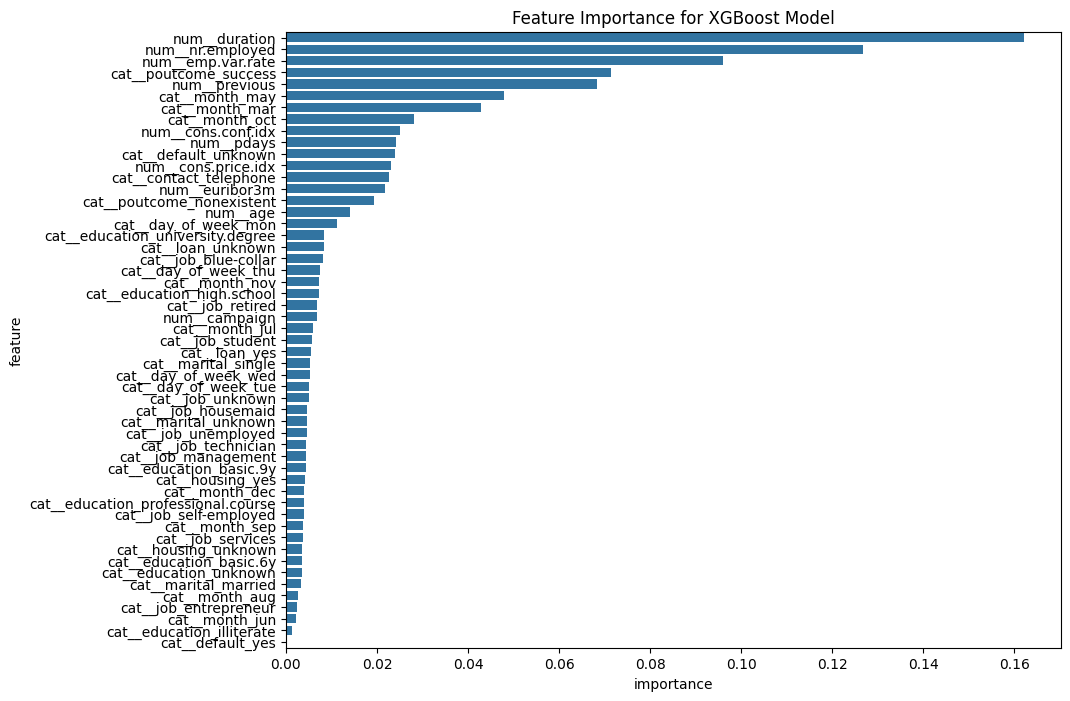

                               feature  importance
1                        num__duration        0.16
9                     num__nr.employed        0.13
5                    num__emp.var.rate        0.10
52               cat__poutcome_success        0.07
4                        num__previous        0.07
43                      cat__month_may        0.05
42                      cat__month_mar        0.04
45                      cat__month_oct        0.03
7                   num__cons.conf.idx        0.02
3                           num__pdays        0.02
31                cat__default_unknown        0.02
6                  num__cons.price.idx        0.02
37              cat__contact_telephone        0.02
8                       num__euribor3m        0.02
51           cat__poutcome_nonexistent        0.02
0                             num__age        0.01
47                cat__day_of_week_mon        0.01
29    cat__education_university.degree        0.01
35                   cat__loan_

In [104]:
best_model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.3,
    n_estimators=150,
    colsample_bytree=0.3,
    subsample=0.9,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_model.fit(preprocessor.transform(X_train), y_train)

# Calculate feature importances
importance = best_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance for XGBoost Model')
plt.show()

# print feature importance results
print(feature_importance_df)

## Feature Importance Analysis

After analyzing the feature importance, we can conclude which features have the most impact on the model's results. Below are some of the most important features identified:

- **duration** (Тривалість останнього контакту в секундах): Importance 0.16
- **nr.employed** (Кількість працевлаштованих): Importance 0.13
- **emp.var.rate** (Зміна рівня зайнятості): Importance 0.10
- **poutcome_success** (Результат попередньої кампанії - успіх): Importance 0.07
- **previous** (Кількість попередніх контактів): Importance 0.07


## Feature Importance Analysis from a "Common Sense" Perspective

- **Duration of the last contact (duration):** This makes sense as longer conversations may indicate greater client interest.
- **Number of employed (nr.employed):** This may reflect the overall economic climate, influencing clients' decisions.
- **Change in employment rate (emp.var.rate):** Again, this is an indicator of the economic climate.
- **Previous campaign outcome - success (poutcome_success):** It's logical that success in previous campaigns increases the likelihood of success in the current campaign.
- **Number of previous contacts (previous):** The more previous contacts, the more information is available about the client, which can increase the chances of success.


The most important features for the model included contact duration (duration), the number of employed individuals (nr.employed), and employment variation rate (emp.var.rate). These features significantly impact the final decision of whether the client will subscribe to the deposit.

# Error Analysis:

To better understand the model's weaknesses, we will analyze the false positives and false negatives:
- **False Positives**: Clients predicted to subscribe but did not.
- **False Negatives**: Clients predicted not to subscribe but did.

## Confusion Matrix:
We will first look at the confusion matrix to summarize the classification results.


In [105]:
# Predictions on the test set
y_pred = best_model.predict(preprocessor.transform(X_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(cm)

# Gathering the records where the model made mistakes
false_positives = X_test[(y_test == 0) & (y_pred == 1)]
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]

# Analysis of the incorrect records
print("False Positives Analysis:")
print(false_positives.describe())

print("False Negatives Analysis:")
print(false_negatives.describe())

Confusion Matrix:
[[10622   346]
 [  675   714]]
False Positives Analysis:
         age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  contacts_total
count 346.00    346.00    346.00 346.00    346.00        346.00          346.00         346.00     346.00       346.00          346.00
mean   41.31    657.74      2.02 815.21      0.46         -1.38           93.28         -39.12       2.05      5092.74            2.48
std    13.89    482.50      1.46 386.36      0.84          1.68            0.68           6.39       1.73        87.18            1.63
min    17.00    101.00      1.00   2.00      0.00         -3.40           92.20         -50.80       0.64      4963.60            1.00
25%    31.00    289.75      1.00 999.00      0.00         -2.90           92.84         -42.70       0.80      5017.50            1.00
50%    36.50    544.00      1.00 999.00      0.00         -1.80           93.08         -40.30       1.26      5076

### Confusion Matrix Summary:

- **True Positives (TP):** 714  
- **True Negatives (TN):** 10,622  
- **False Positives (FP):** 346  
- **False Negatives (FN):** 675  

### False Positives Analysis:
Age, duration of contact, number of previous contacts, and other features show significant variation. For example, the mean value for contact duration (duration) for false positives is 657.74 seconds, indicating longer conversations that still resulted in a failed outcome.

### False Negatives Analysis:
For false negatives, the average values differ slightly. For example, the mean value for contact duration (duration) for false negatives is 496.56 seconds, indicating slightly shorter conversations.



## Overall Conclusion:

In this project, we analyzed a classification task to predict whether a client would subscribe to a term deposit. We explored the data, performed preprocessing, and created several machine learning models, including Logistic Regression, Decision Tree, k-Nearest Neighbors, and XGBoost.

### Key Results:

- **Logistic Regression**:
  - Strengths: Balanced between precision and recall.
  - Weaknesses: Slight underperformance in edge cases where decisions were less clear.
  - **Recommendation:** Suitable as a baseline model but could benefit from further feature engineering.

- **Decision Tree**:
  - Strengths: Provides easily interpretable results.
  - Weaknesses: Overfitting to the training data, leading to poor generalization on the test set.
  - **Recommendation:** Consider regularization or pruning techniques to improve generalization.

- **k-Nearest Neighbors (kNN)**:
  - Strengths: Competitive results in certain cases.
  - Weaknesses: Slightly reduced accuracy on the test set, with potential scalability issues.
  - **Recommendation:** Tuning hyperparameters and increasing the number of neighbors could improve performance.

- **XGBoost**:
  - Strengths: Demonstrated the highest accuracy and best-balanced performance across all metrics.
  - Weaknesses: Slight complexity in training and interpretation.
  - **Recommendation:** With hyperparameter tuning, this model is recommended for production use due to its robust performance.

  We also performed hyperparameter tuning for the XGBoost model using Randomized Search and Hyperopt, which allowed us to find optimal parameters and improve the model's performance.

---

## Recommendations:

### 1. Model Optimization:
- Further tune hyperparameters for models like kNN and Decision Tree to minimize overfitting.
- Implement ensemble methods (e.g., stacking, boosting) to improve overall prediction accuracy.

### 2. Error Mitigation:
- Conduct deeper analysis on false positives and false negatives to identify patterns and address specific client segments.
- Explore additional features such as customer financial history or behavioral data to refine predictions.

### 3. Feature Interpretation:
- Use tools like SHAP or LIME to interpret model predictions and improve transparency for stakeholders.

---

## Conclusion:

In this project, the **XGBoost** model emerged as the top-performing classifier, providing balanced accuracy, precision, and recall. By focusing on key features such as **contact duration** and **employment variation rate**, we identified critical drivers of client behavior.

### Key Takeaways:
1. **Best Model**: XGBoost with hyperparameter tuning via Randomized Search and Hyperopt.
2. **Important Features**: The most significant features were `duration`, `nr.employed`, and `emp.var.rate`.
3. **Error Insights**: False positives were associated with longer conversations, while false negatives often had shorter durations but still resulted in a subscription.

---

## Future Work:

Looking ahead, the following steps could further improve the model:

1. **Expand the dataset**: Introduce additional features like transactional data or past account activity.
2. **Deploy in production**: Implement real-time predictions using cloud-based infrastructure.
3. **Model Monitoring**: Regularly retrain the model to adapt to changing market conditions and customer behaviors.
